# **Linear Regression Using Scikit Library**

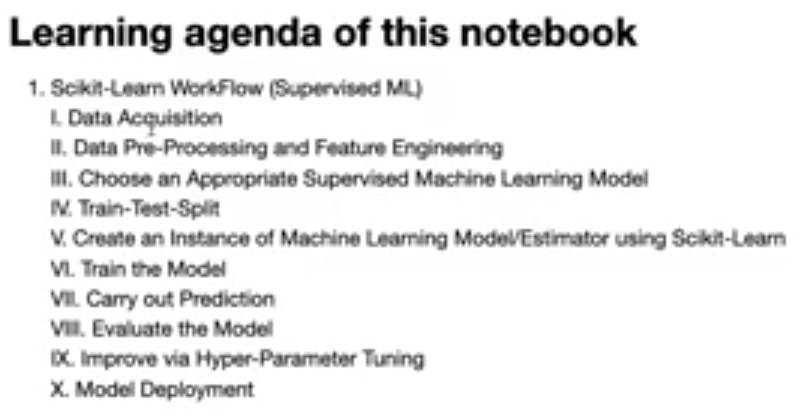

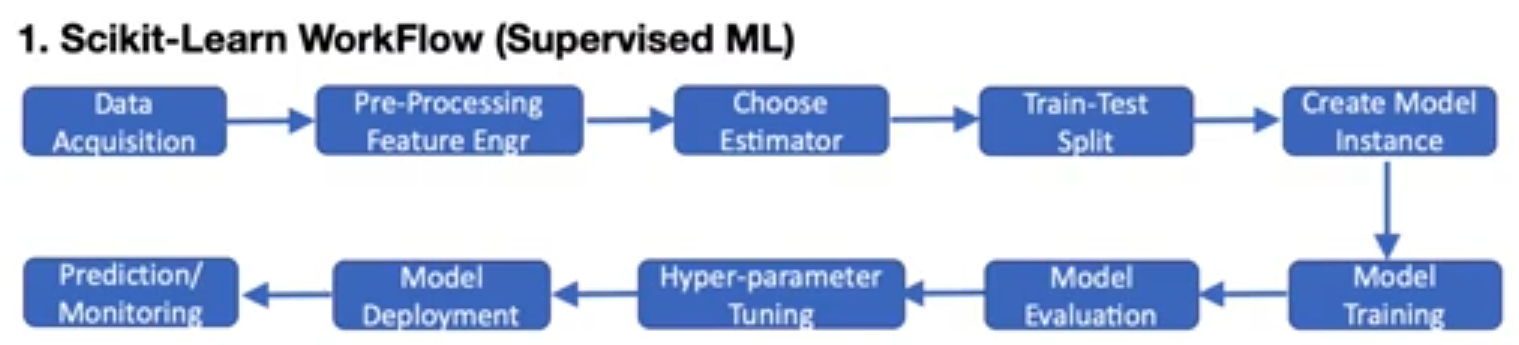

**Simple Advertising Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"D:\Codes\MachineLearning\Datasets\advertising4D.csv")
df


TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


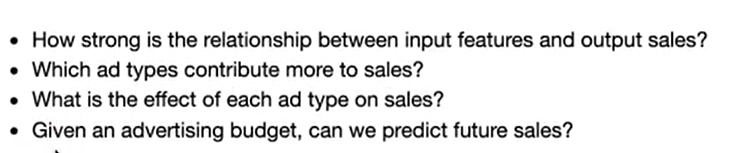

**Checking Outliers**

<Axes: ylabel='radio'>

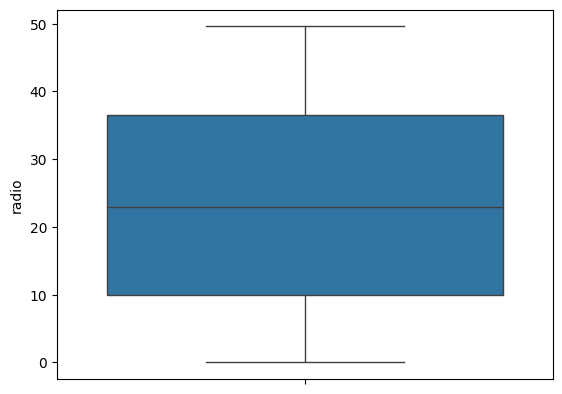

In [4]:
# sns.boxplot(df["newspaper"])
sns.boxplot(df["radio"])
# sns.boxplot(df["TV"])

<Axes: ylabel='newspaper'>

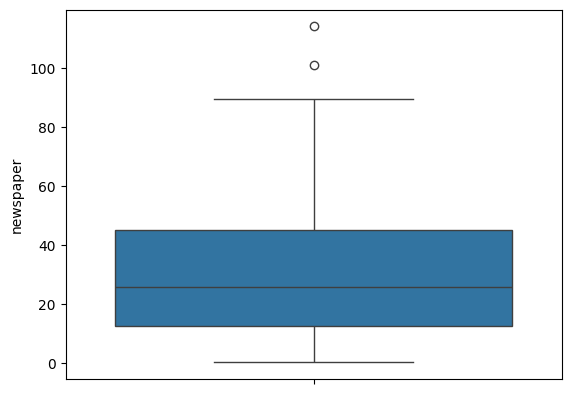

In [5]:
sns.boxplot(df["newspaper"])


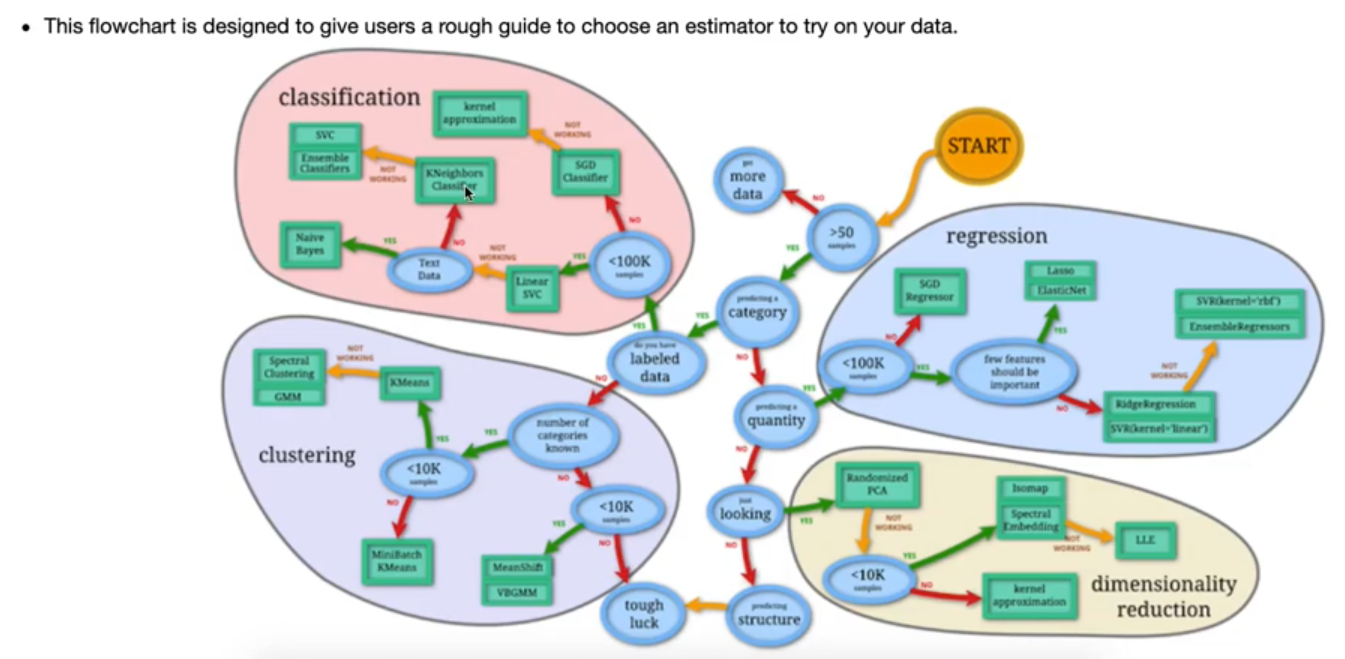

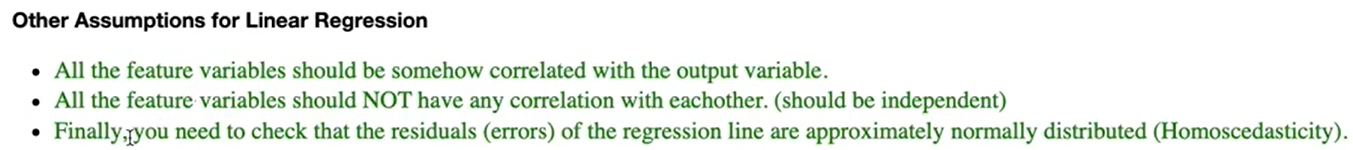

In [6]:
df.keys()

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

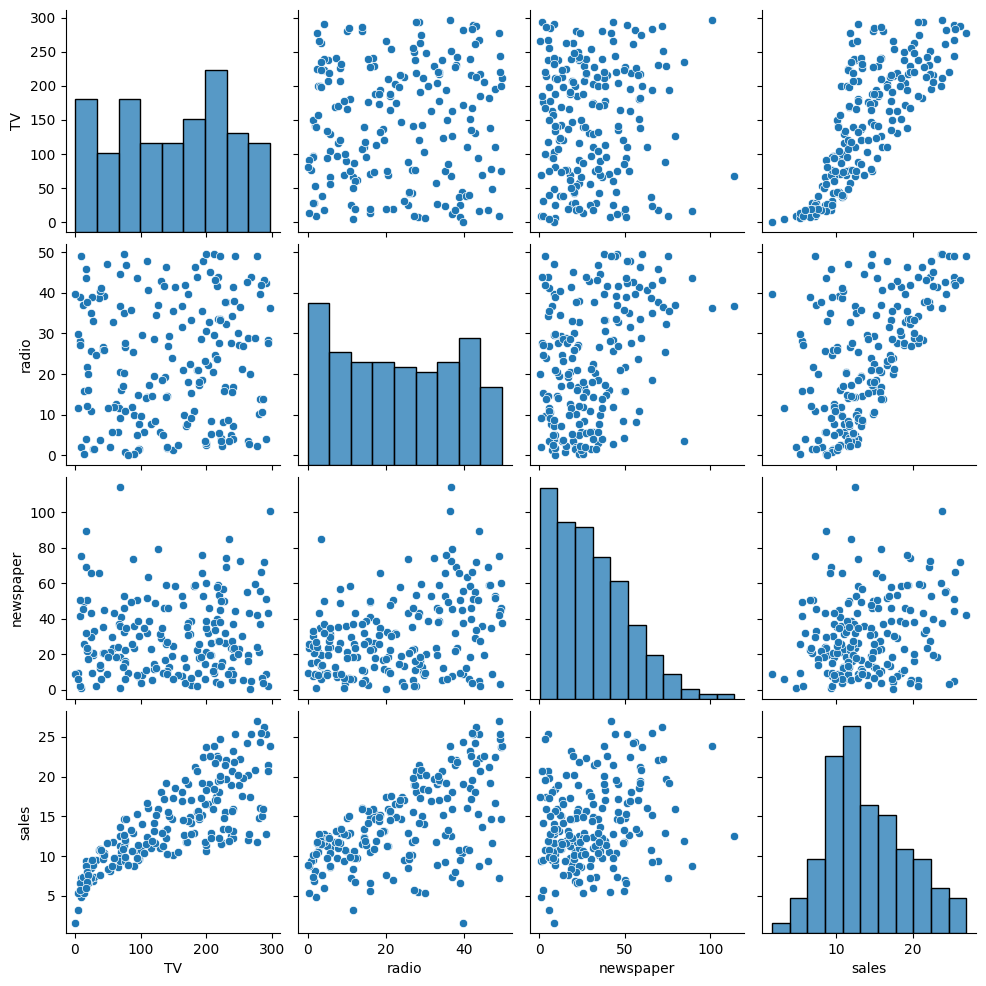

In [7]:
sns.pairplot(df)

**Train, Test and Split Data**

In [8]:
X = df.drop("sales", axis=1)
X

TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]

In [9]:
y = df["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split as tts

# ------------------------------------------------------------------------------------------------- 
# for understanding check tts or train_test_split during pressed brackets -> () press shift + tab.
# ------------------------------------------------------------------------------------------------- 

X_train, X_test, y_train, y_test = tts( X, y, test_size=0.25, random_state=54)


In [11]:
len(df), len(X_train), len(X_test), len(y_train), len(y_test)

(200, 150, 50, 150, 50)

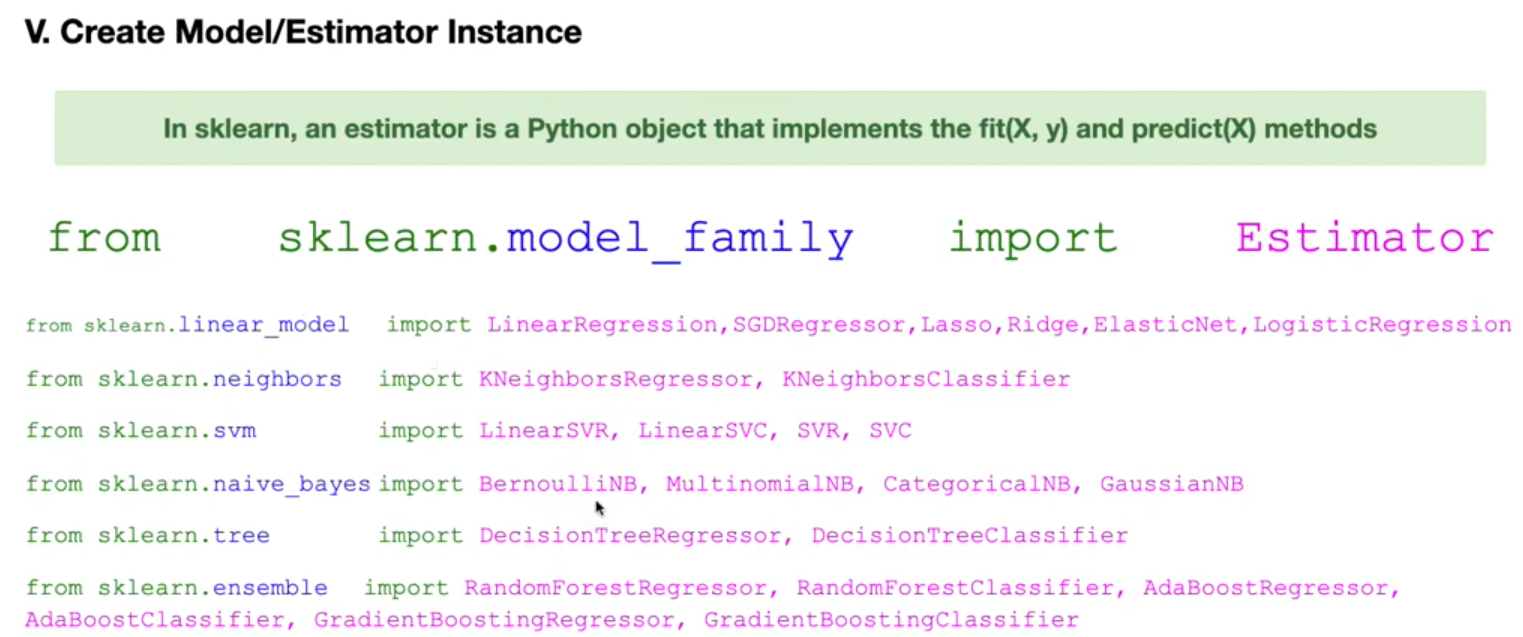

In [12]:
from sklearn.linear_model import LinearRegression

help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(
 |      *,
 |      fit_intercept=True,
 |      copy_X=True,
 |      n_jobs=None,
 |      positive=False
 |  )
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the comp

In [13]:
lr_model = LinearRegression()


In [14]:
lr_model.fit(X_train, y_train) 


LinearRegression()

In [16]:
# the coef says change in one feature and other will fixed, cause change in Sales Same as changed Feature. 
lr_model.coef_

array([ 0.04604945,  0.18745145, -0.00238812])

In [ ]:
# if all the feature pass as a zeros, the Sales Will start from 2.90 
lr_model.intercept_

np.float64(2.9086397036752185)

In [18]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

**Evalution of Trained Model**

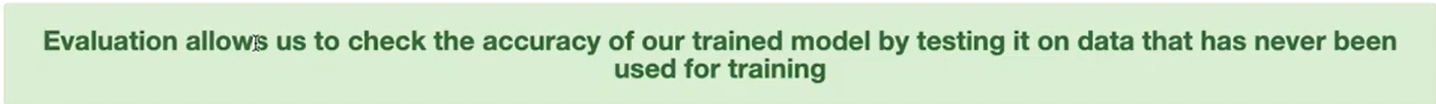

In [19]:
X_test.head()

TV  radio  newspaper
179  165.6   10.0       17.6
166   17.9   37.6       21.6
187  191.1   28.7       18.2
119   19.4   16.0       22.3
186  139.5    2.1       26.6

In [22]:
y_test.head(10)

179    12.6
166     8.0
187    17.3
119     6.6
186    10.3
134    10.8
142    20.1
12      9.2
118    15.9
178    11.8
Name: sales, dtype: float64

In [23]:
y_predicted = lr_model.predict(X_test)
y_predicted

array([12.36691266, 10.72951601, 17.04508295,  6.74796718,  9.6626624 ,
       11.68682972, 19.1954224 , 10.42678538, 15.42487523, 16.02506317,
        9.69480224, 13.94781728, 16.46118569, 17.28473955,  8.77857758,
       23.12122373,  8.0946472 , 13.11939016,  9.75410236, 11.27709668,
       18.67552233, 11.93814337, 18.88768695, 20.42502562, 13.91724846,
       13.44810534, 12.13921504, 24.04140759,  9.07422676, 14.63172777,
       19.95987872,  9.70404261, 19.35447237, 21.18469023, 18.14870137,
       20.78715102,  6.49416502, 15.26622127, 20.29454707,  6.05091477,
       12.09013015,  8.39552033, 18.11886767,  7.56033228, 24.72628564,
       11.53891789, 10.56972192,  9.93891417, 12.80190037,  8.14566649])

In [24]:
test_residuals = y_test - y_predicted
test_residuals

179    0.233087
166   -2.729516
187    0.254917
119   -0.147967
186    0.637338
134   -0.886830
142    0.904578
12    -1.226785
118    0.475125
178   -4.225063
138   -0.094802
43    -1.047817
194    0.838814
11     0.115260
44    -0.278578
101    0.678776
49     1.605353
4     -0.219390
149    0.345898
31     0.622903
188   -2.775522
116    0.261857
33    -1.487687
0      1.674974
181   -1.717248
161   -0.148105
2     -2.839215
183    2.158592
125    1.525773
81    -2.331728
176    0.240121
145    0.595957
124    0.345528
55     2.515310
153    0.851299
137    0.012849
182    2.205835
156    0.033779
104    0.405453
106    1.149085
7      1.109870
191    1.504480
59     0.281132
34     1.939668
175    2.273714
86     0.461082
71     1.830278
151    1.661086
115   -0.201900
196    1.554334
Name: sales, dtype: float64

In [ ]:
![image.png](attachment:image.png)

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)

# RMSE:  1.4570315554451425   # it shows the RMSE will off from predicted value. which is 10%

MAE:  1.1132451966848083
MSE:  2.1229409535628916
RMSE:  1.4570315554451425


**R^2 Score**

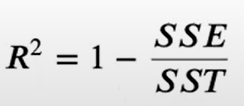

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
r2

0.9187017470701986

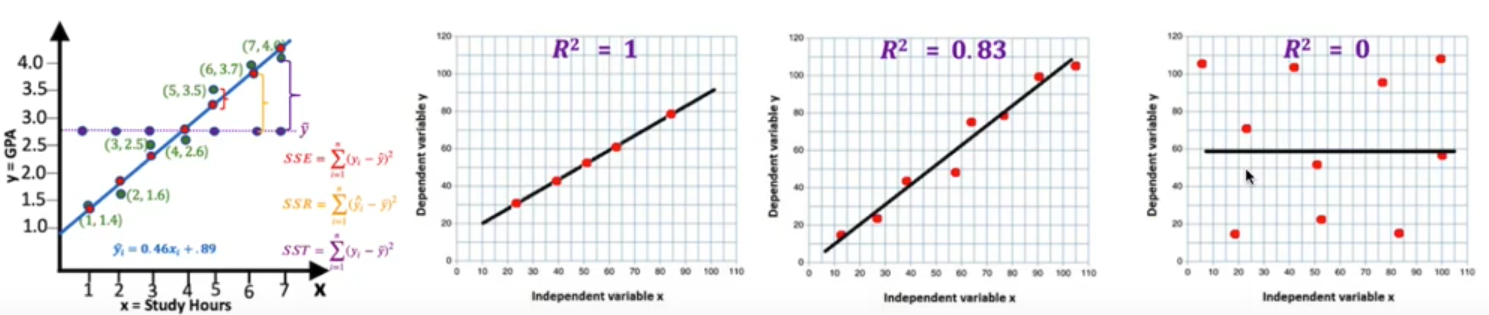

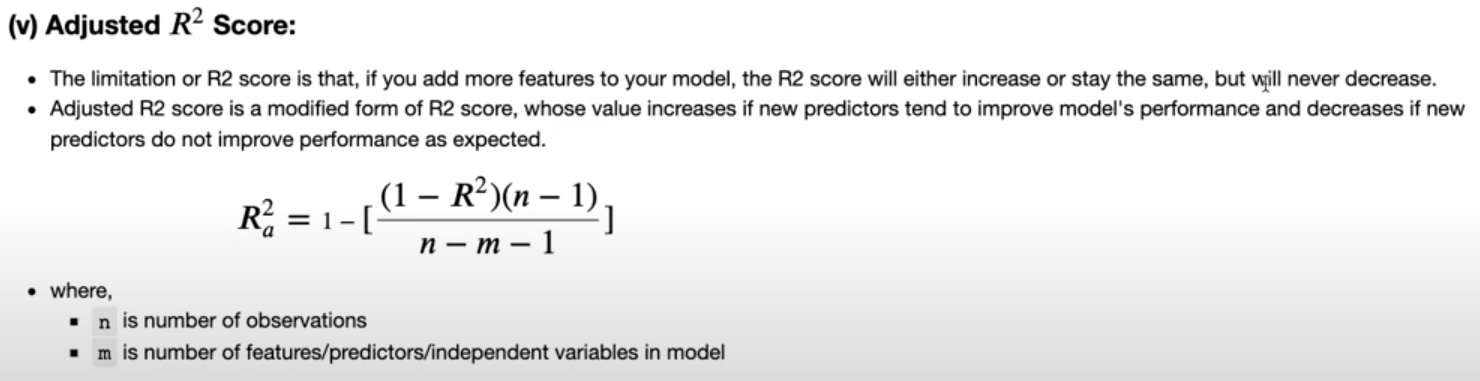

In [27]:
n = len(X_test)
m = 3
r2_adj = 1 - ((1-r2)*(n-1)/(n-m-1))
print("R2 Adjusted: ", r2_adj)

R2 Adjusted:  0.9133996870965159


**Use Residual plot for model validation**

C:\Users\NoNeo\AppData\Local\Temp\ipykernel_3404\3765258587.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


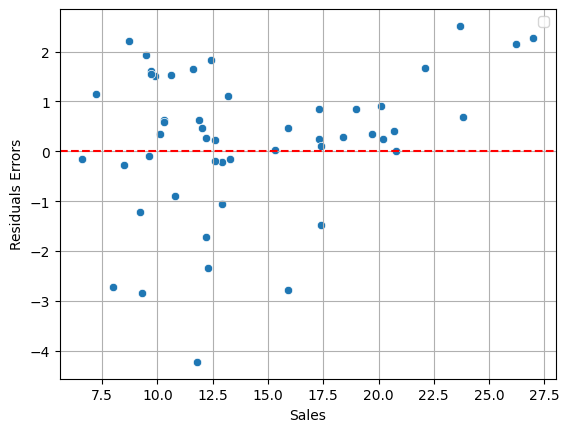

In [29]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals Errors")
plt.axhline(y=0, color="red", ls="--")
plt.grid()
plt.legend()
plt.show()



so there is no linearity or any relation that means the selected model is best.

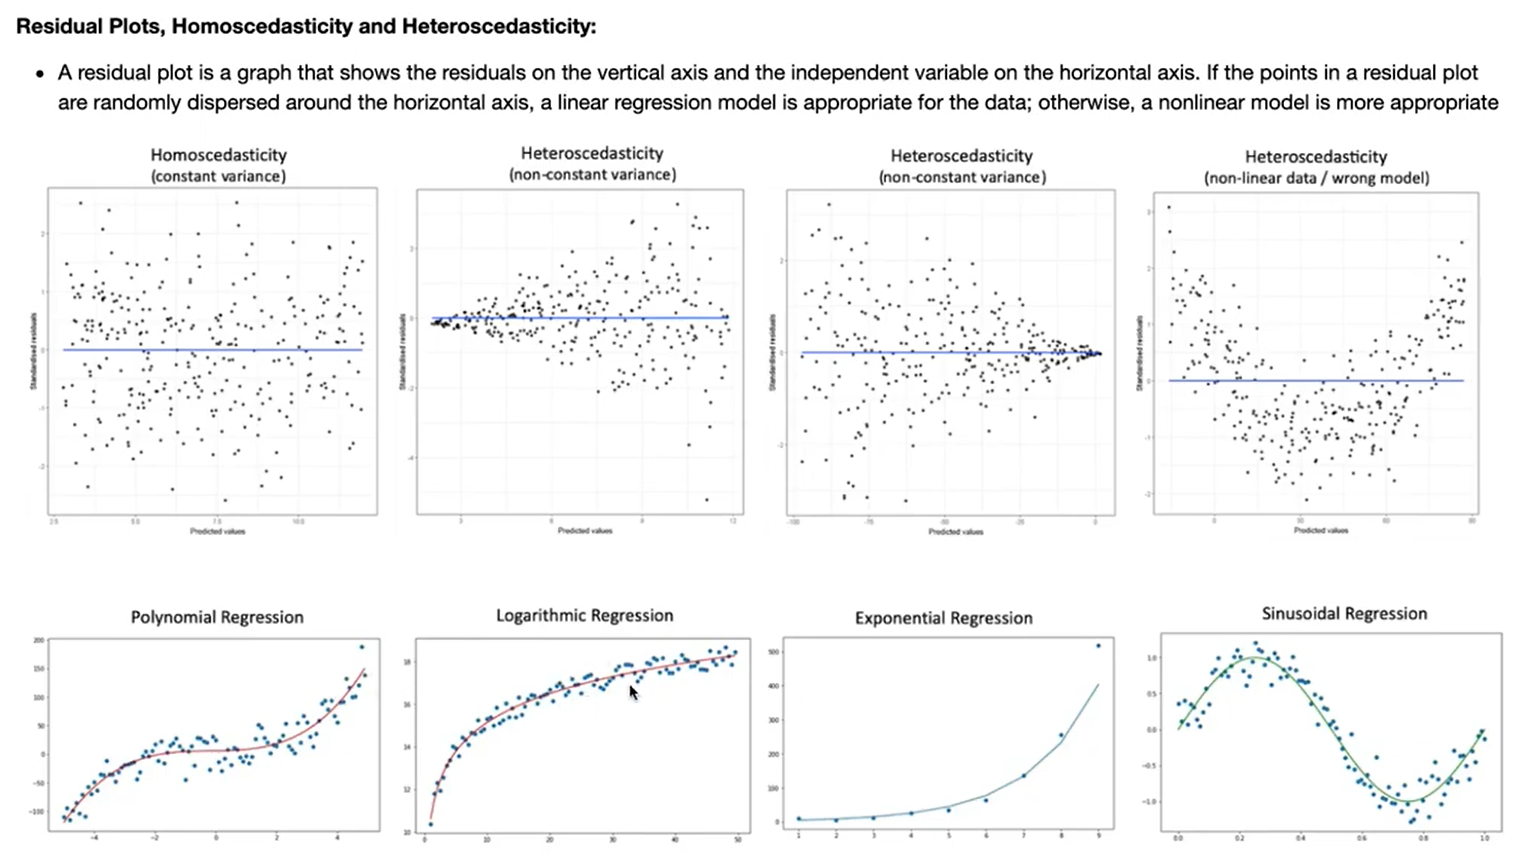

**Improve Hyper Parametter**

## **Model Deployment and Monitoring**

In [32]:
final_model = LinearRegression()

In [33]:
final_model.fit(X,y)

LinearRegression()

In [39]:
from joblib import dump
dump(final_model, "models//adverting_model.joblib")

['models//adverting_model.joblib']

In [40]:
from joblib import load
load_model = load("models//adverting_model.joblib")

In [41]:
load_model.predict([[200,150,0]])


c:\Users\NoNeo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.371321])